# SIT744 Assignment 1: Image Classification with Deep Feedforward Neural Network

<div class="alert-info">
    <p>Due: <strong>8pm 24 August 2020</strong>  (Monday)</p>


This is an <strong>individual</strong> assignment. It contributes <strong>30%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment1_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment1_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment1_solution.ipynp </li>
<li> 123456_assignment1_output.html</li>
</ul>
</p>

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective



This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.

In this assignment, you are going to work with the Fashion-MNIST dataset for image recognition. The dataset contains 10 classes of 28x28 grayscale images. You will see some examples in the visualization task below. 

This assignment consists of five tasks.


In [101]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## Task 1 Load the data

*(weight ~5%)*

Load the Fashion MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). You may get the data via Keras (keras.datasets) or Tensorflow Datasets (tfds). 

In [102]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Task 2 Understand the data

*(weight ~15%)*



Display 100 images from the train set in the form of 10x10 matrix.

Answer the following questions:

1. What are the unique labels in this dataset?
2. How many training images and how many test images?
3. What is the size of each image?
4. Find out the numeric range of the input. Do we need to rescale the input?
5. In our problem, what are the shapes of input tensors and target tensors? Do you need to reshape the input?


In [103]:
# Printing the number of training dataset and testing datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


Ans 2. there are 60000 image sin train data and 10000 images in test data.


ANS 3. The size of each image is 28*28 as seen by the train.shape code


Ans 4. No we do not need to recale the input, but we still will be rescaling just in case


y = 2 Pullover


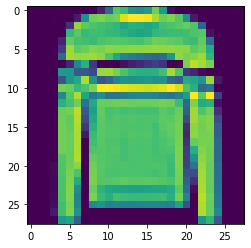

In [104]:
# Here we will define the text labels
# the index starts from 0 
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]   

# Image index, you can pick any number
img_ind = 5



# y_train will contains the lables
# It should be ranging from 0 to 9
label_ind = y_train[img_ind]



# Printing the label
print ("y = " + str(label_ind) + " " +(fashion_mnist_labels[label_ind]))

 
# Show one of the images from the training dataset #pullover
plt.imshow(x_train[img_ind])

## Task 3 Construct an input pipeline

*(weight ~15%)*

Creat train/validate/test data splits and construct tf.data pipelines. Make sure that the training data is batched.


In [105]:
#we rescale the model for smoothness 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [106]:
# Here we break training data into training dataset and validation sets 
# i decided to put 10000 data into validation set and keep remaining 50,000 for training set
(x_train, x_valid) = x_train[10000:], x_train[:10000] 
(y_train, y_valid) = y_train[10000:], y_train[:10000]


In [107]:
# Reshaping input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [108]:
# Printing the training dataset shape
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (50000, 28, 28, 1)
y_train shape: (50000, 10)


In [109]:
# Print the number of training set 
print(x_train.shape[0], 'train set')
# Print the number of validation
print(x_valid.shape[0], 'validation set')
# Print the number of test datasets
print(x_test.shape[0], 'test set')

50000 train set
10000 validation set
10000 test set


## Task 4 Construct a deep forward neural network

*(weight ~35%)*

### Task 4.1 Setting up a model for training

Construct a deep feedforward neural network. You need to decide and report the following configurations:

- Output layer: 
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
- The loss function
- The metrics for model evaluation (which may be different from the loss function)
- The optimiser

Justify your model design decisions.

Plot the model structure `using keras.utils.plot_model` or similar tools.

**All the questions above can be anwered by the code and the explaination below with the help of the produced table and the structure generated by using keras.utils.plot_model**



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)             

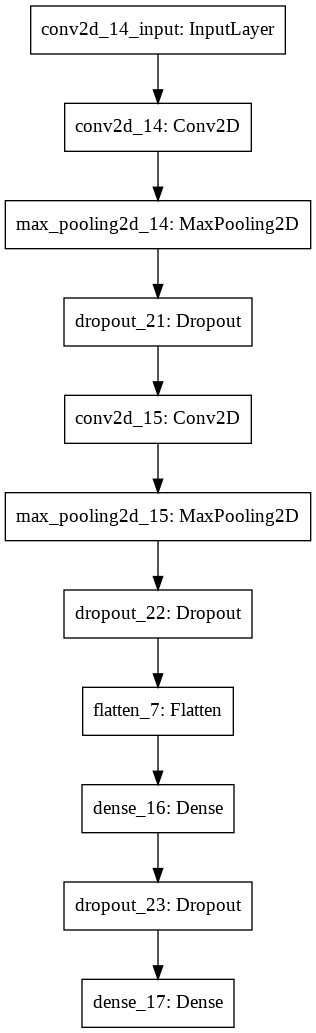

In [110]:
model = tf.keras.Sequential()

# we will define the shape of the input in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# taking a look at the summary of our model
model.summary()

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

**Compiling the model**

In [111]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Task 4.2 Fitting the model

Now fit the model. Decide and report the following training setting:

1. The training batch size
2. The number of training epochs (at least 1,000 epochs recommended)
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well.

Plot the training and validation loss and accuracy. Answer the following questions:

1. Do you see overfitting or underfitting? Why?
2. If you see overfitting, at which epoch did it happen?

** The batch size and the number of epoch is visible in the below code.**
**i have noticed overfitting at epoch 13**

In [112]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=25,
# the number of epoch is reduced due to low gpu power computer, with high end power machine the number can be increased.
# i choose 25 epoch runs for my best accuracy and performace of my machine (it took 3 min for 25 epoch runs)
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/25
770/782 [============================>.] - ETA: 0s - loss: 0.6346 - accuracy: 0.7640
Epoch 00001: val_loss improved from inf to 0.40966, saving model to model.weights.best.hdf5
782/782 [==============================] - 4s 5ms/step - loss: 0.6322 - accuracy: 0.7650 - val_loss: 0.4097 - val_accuracy: 0.8508
Epoch 2/25
777/782 [============================>.] - ETA: 0s - loss: 0.4257 - accuracy: 0.8430
Epoch 00002: val_loss improved from 0.40966 to 0.35343, saving model to model.weights.best.hdf5
782/782 [==============================] - 4s 5ms/step - loss: 0.4259 - accuracy: 0.8429 - val_loss: 0.3534 - val_accuracy: 0.8717
Epoch 3/25
774/782 [============================>.] - ETA: 0s - loss: 0.3877 - accuracy: 0.8577
Epoch 00003: val_loss improved from 0.35343 to 0.31268, saving model to model.weights.best.hdf5
782/782 [==============================] - 4s 5ms/step - loss: 0.3873 - accuracy: 0.8578 - val_loss: 0.3127 - val_accuracy: 0.8833
Epoch 4/25
772/782 [===============

In [113]:
model.load_weights('model.weights.best.hdf5')

In [114]:
score = model.evaluate(x_test, y_test, verbose=0)

# Printing the test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9200000166893005


### Task 4.3 Check the convergence through gradient

Use  TensorBoard to check the gradients. 

- Do you see vanishing or exploding gradients?
- Use the gradient norm to check if the training has converged to a local minimum.

Show screenshots of your TensorBoard output.

## Task 5 Fine-tuning the model

*(weight ~30%)*

You may see above that your model is overfitting. There are multiple things you can do. Below are some options:

1. Add dropout
2. Add Batch Normalisation
3. Add layer-specific weight regularizations
4. Change the learning rate

Apply different regularisation techniques to the model training. You may also try other techniques for improving training such as learning rate scheduling (see https://www.tensorflow.org/guide/keras/train_and_evaluate#using_learning_rate_schedules).

Run **five or more** experiments of different training configurations and record the test accuracy achieved in the Markdown table below. You may modify the table heading to match your experiment design.



|Dropout (rate)   | Batch Normalisation (Y/N)  | Optimiser  | Learning Rate  | Number of Epochs   |  Test Accuracy |
|---|---|---|---|---|---|
|   |   |   |   |   |   |
|   |   |   |   |   |   |
|   |   |   |   |   |   |



Answer the following questions:

1. Which configuration achieved the best test accuracy?
2. Which setting had the most impact and which one had the least impact?

## Task 6 Generate HTML output

Use *nbconvert* to convert your completed notebook into an HTML file and name it **[YourID]_assingment1_output.html**.

In [115]:
pip install nbconvert

In [116]:
!jupyter nbconvert --to html 218612723_Assignment1_solution.ipynb

[NbConvertApp] WARNING | pattern u'218612723_Assignment1_solution.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'


---
**END OF ASSIGNMENT ONE**

